<a href="https://colab.research.google.com/github/rhkhoo/Thinkful-2020/blob/master/Python_Self_Sufficiency_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

In [ ]:
def reverse(input):
  print(input[::-1])

In [ ]:
reverse('forward')

drawrof


# 2. Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [ ]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """
    prob1 = a * b_given_a
    prob2 = (1-a) * b_given_not_a
    denom = prob1 + prob2
    return prob1 / denom

In [ ]:
bayes(0.005, 0.98, 0.1)

0.046934865900383135

# 3. Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

- Stolen bases per game
- Wins
- Earned run average

In [ ]:
all_records = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')
after_1995 = (all_records['yearID'] >= 1995)
records = all_records[after_1995]
records.info()
records.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 2181 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          624 non-null    int64  
 1   lgID            624 non-null    object 
 2   teamID          624 non-null    object 
 3   franchID        624 non-null    object 
 4   divID           624 non-null    object 
 5   Rank            624 non-null    int64  
 6   G               624 non-null    int64  
 7   Ghome           624 non-null    float64
 8   W               624 non-null    int64  
 9   L               624 non-null    int64  
 10  DivWin          624 non-null    object 
 11  WCWin           624 non-null    object 
 12  LgWin           624 non-null    object 
 13  WSWin           624 non-null    object 
 14  R               624 non-null    int64  
 15  AB              624 non-null    int64  
 16  H               624 non-null    int64  
 17  2B              624 non-null   

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,Y,N,Y,Y,645,4814,1202,210,27,168,520,933.0,73.0,43.0,NaN,NaN,540,493,3.44,18,11,34,3873,1184,107,436,1087,100,113.0,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,N,N,N,N,704,4837,1267,229,27,173,574,803.0,92.0,45.0,NaN,NaN,640,607,4.31,19,10,29,3801,1165,149,523,930,72,141.0,0.98,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL
2183,1995,AL,BOS,BOS,E,1,144,72.0,86,58,Y,N,N,N,791,4997,1399,286,31,175,560,923.0,99.0,44.0,NaN,NaN,698,630,4.39,7,9,39,3876,1338,127,476,888,120,151.0,0.97,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS
2184,1995,AL,CAL,ANA,W,2,145,72.0,78,67,N,N,N,N,801,5019,1390,252,25,186,564,889.0,58.0,39.0,NaN,NaN,697,645,4.52,8,9,42,3852,1310,163,486,901,95,120.0,0.98,California Angels,Anaheim Stadium,1748680.0,99,99,CAL,CAL,CAL
2185,1995,AL,CHA,CHW,C,3,145,72.0,68,76,N,N,N,N,755,5060,1417,252,37,146,576,767.0,110.0,39.0,NaN,NaN,758,692,4.85,12,4,36,3852,1374,164,617,892,108,131.0,0.98,Chicago White Sox,Comiskey Park II,1609773.0,96,95,CHW,CHA,CHA


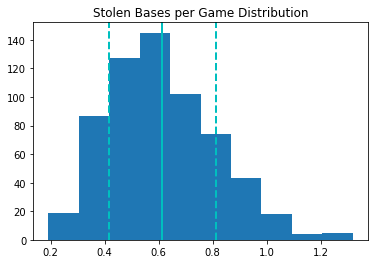

In [ ]:
plt.hist(records['SB']/records['G'])

plt.title('Stolen Bases per Game Distribution')

m = np.mean(records['SB']/records['G'])
s = np.std(records['SB']/records['G'])

plt.axvline(m, color='c', linestyle='solid', linewidth=2)
plt.axvline(m + s, color='c', linestyle='dashed', linewidth=2)
plt.axvline(m - s, color='c', linestyle='dashed', linewidth=2)

The 'Stolen Bases per Game' variable appears to follow a Poisson distribution since we are measuring number of stolen bases per a certain amount of time (one game).

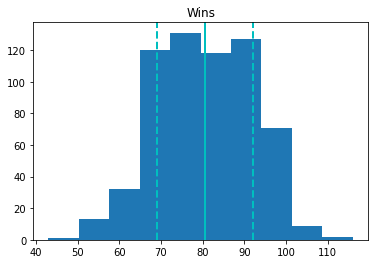

In [ ]:
plt.hist(records['W'])

plt.title('Wins')

m = np.mean(records['W'])
s = np.std(records['W'])

plt.axvline(m, color='c', linestyle='solid', linewidth=2)
plt.axvline(m + s, color='c', linestyle='dashed', linewidth=2)
plt.axvline(m - s, color='c', linestyle='dashed', linewidth=2)

'Wins' seems to follow a Binomial distribution since we are measuring a variable with only two possible outcomes.

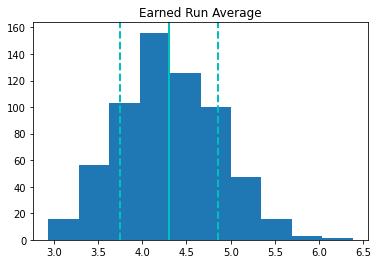

In [ ]:
plt.hist(records['ERA'])

plt.title('Earned Run Average')

m = np.mean(records['ERA'])
s = np.std(records['ERA'])
med = np.median(records['ERA'])

plt.axvline(m, color='c', linestyle='solid', linewidth=2)
plt.axvline(m + s, color='c', linestyle='dashed', linewidth=2)
plt.axvline(m - s, color='c', linestyle='dashed', linewidth=2)

This variable seems to follow a Normal distribution. This makes sense as very few pitchers will have very high or very low ERAs, the rest will cluster towards the center of the range. The mean and the median of the data are also nearly identical, supporting this being a normal distribution.

## b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

Text(0, 0.5, 'Stolen Bases per Game')

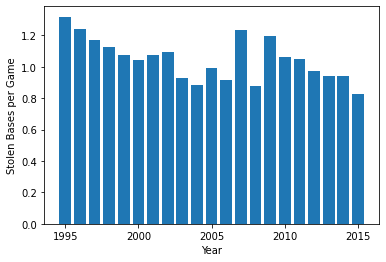

In [ ]:
plt.bar(records['yearID'], records['SB']/records['G'])

plt.xlabel('Year')
plt.ylabel('Stolen Bases per Game')

Bases stolen per game appears to have decreased over time. Why might this be? First, let's look at how stealing bases affects winning:

Text(0, 0.5, 'Wins')

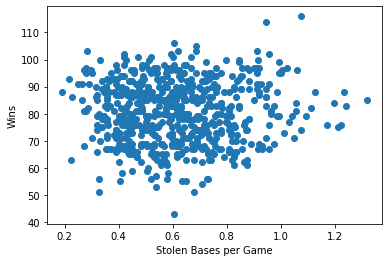

In [ ]:
plt.scatter(records['SB']/records['G'], records['W'])

plt.xlabel('Stolen Bases per Game')
plt.ylabel('Wins')

There doesn't seem to be a strong correlation between stolen bases and winning, so teams might advise their players that attempting to steal a base isn't work the risk. We can look further into how being caught stealing affects winning:

Text(0, 0.5, 'Losses')

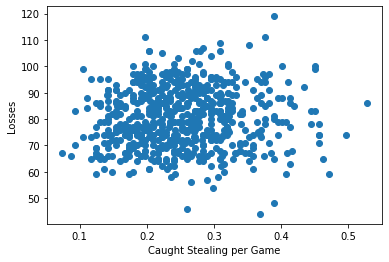

In [ ]:
plt.scatter(records['CS']/records['G'], records['L'])

plt.xlabel('Caught Stealing per Game')
plt.ylabel('Losses')

Text(0, 0.5, 'Wins')

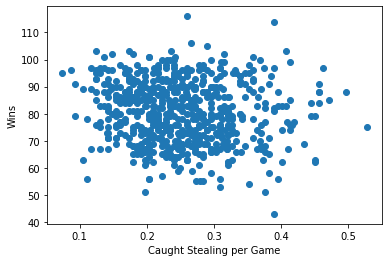

In [ ]:
plt.scatter(records['CS']/records['G'], records['W'])

plt.xlabel('Caught Stealing per Game')
plt.ylabel('Wins')

Being caught stealing doesn't seem to have any effect on wins or losses. Additionaly, the teams with the most stolen bases per game are the highest ranked:

Text(0, 0.5, 'Stolen Bases per Game')

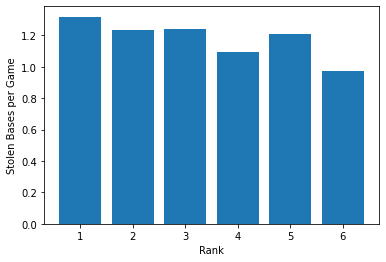

In [ ]:
plt.bar(records['Rank'], records['SB']/records['G'])

plt.xlabel('Rank')
plt.ylabel('Stolen Bases per Game')

So why are stolen bases declining in popularity when at worst they don't increase wins or losses and at best they increase wins and team rank? If the data set included statistics like Stolen Base Runs (SBR) or Stolen Base Percentage (SB%), more analysis could be done to find how often stolen bases result in a run for the team and find what percentage of steals are actually effective. These insights could tell us whether teams might be instructing their player to not take the risk of stealing bases.

# 4. Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].

Text(0.5, 1.0, 'Wins Distribution')

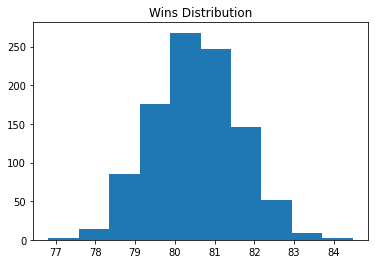

In [ ]:
results = []
i = 0
while i < 1000:
  samples = records['W'].sample(n=100)
  results.append(np.mean(samples))
  i += 1

plt.hist(results)
plt.title('Wins Distribution')

Text(0.5, 1.0, 'Earned Run Average Distribution')

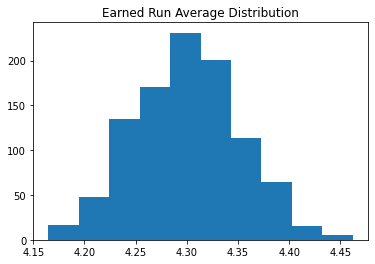

In [ ]:
results = []
i = 0
while i < 1000:
  samples = records['ERA'].sample(n=100)
  results.append(np.mean(samples))
  i += 1

plt.hist(results)
plt.title('Earned Run Average Distribution')

Both of these distributions seem to follow a Normal distribution.